<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/catdog_ver20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-07-20 01:15:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  33.6MB/s    in 1.9s    

2022-07-20 01:15:30 (33.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive/deeplearning/tmp2')
zip_ref.close()

In [2]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/deeplearning/dogs-vs-cats.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive/deeplearning/tmp')
zip_ref.close()

In [7]:
# 기본 경로
base_dir = '/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered/train/cats
/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered/train/dogs
/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered/validation/cats
/content/drive/MyDrive/deeplearning/tmp2/cats_and_dogs_filtered/validation/dogs


In [8]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg']
['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg']


In [9]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


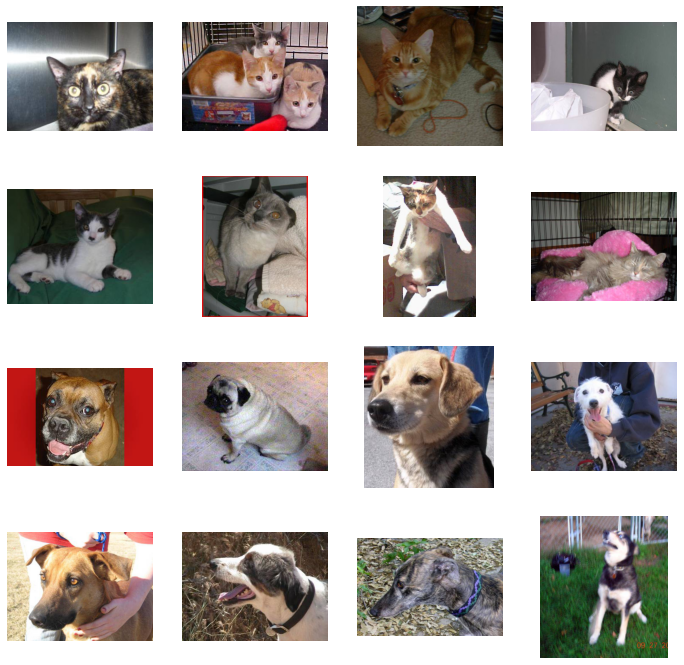

In [10]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=2,
                    validation_steps=50,
                    verbose=2)

Epoch 1/2
100/100 - 137s - loss: 0.6956 - accuracy: 0.5650 - val_loss: 0.6543 - val_accuracy: 0.5950 - 137s/epoch - 1s/step
Epoch 2/2
100/100 - 86s - loss: 0.6612 - accuracy: 0.6425 - val_loss: 0.6331 - val_accuracy: 0.6660 - 86s/epoch - 864ms/step


In [21]:
# -- Save model -- 
model.save('/content/drive/MyDrive/deeplearning/tmp2/my_model-catdog-1.h5')

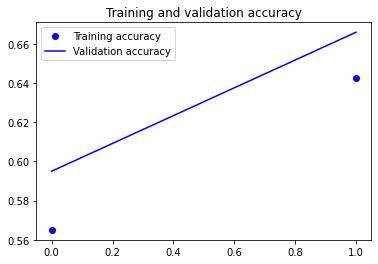

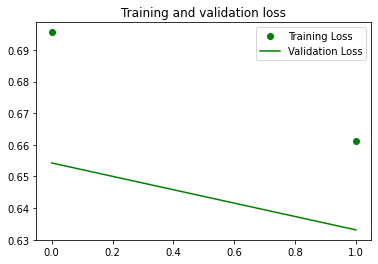

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_09.jpg to KakaoTalk_20220411_063656432_09.jpg
[1.4088487e-05]
KakaoTalk_20220411_063656432_09.jpg is a dog


In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_13.jpg to KakaoTalk_20220411_063656432_13.jpg
[1.]
KakaoTalk_20220411_063656432_13.jpg is a dog


In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.0.jpg to cat.0.jpg
[1.]
cat.0.jpg is a dog


In [22]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
100/100 - 79s - loss: 0.5901 - accuracy: 0.7080 - val_loss: 0.7404 - val_accuracy: 0.5890 - 79s/epoch - 793ms/step
Epoch 2/10
100/100 - 96s - loss: 0.4876 - accuracy: 0.7700 - val_loss: 0.8691 - val_accuracy: 0.5750 - 96s/epoch - 957ms/step
Epoch 3/10
100/100 - 74s - loss: 0.3929 - accuracy: 0.8135 - val_loss: 0.6210 - val_accuracy: 0.7150 - 74s/epoch - 741ms/step
Epoch 4/10
100/100 - 63s - loss: 0.3122 - accuracy: 0.8625 - val_loss: 0.6451 - val_accuracy: 0.7200 - 63s/epoch - 625ms/step
Epoch 5/10
100/100 - 60s - loss: 0.2348 - accuracy: 0.9070 - val_loss: 0.7510 - val_accuracy: 0.6970 - 60s/epoch - 605ms/step
Epoch 6/10
100/100 - 60s - loss: 0.1329 - accuracy: 0.9470 - val_loss: 1.1779 - val_accuracy: 0.6950 - 60s/epoch - 605ms/step
Epoch 7/10
100/100 - 62s - loss: 0.1182 - accuracy: 0.9680 - val_loss: 1.1983 - val_accuracy: 0.6970 - 62s/epoch - 623ms/step
Epoch 8/10
100/100 - 63s - loss: 0.0705 - accuracy: 0.9750 - val_loss: 1.1847 - val_accuracy: 0.7080 - 63s/epoch - 627

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.0.jpg to cat.0 (1).jpg
[0.]
cat.0.jpg is a cat


In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_13.jpg to KakaoTalk_20220411_063656432_13 (1).jpg
[1.]
KakaoTalk_20220411_063656432_13.jpg is a dog


In [25]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
100/100 - 77s - loss: 0.0644 - accuracy: 0.9865 - val_loss: 1.6497 - val_accuracy: 0.7180 - 77s/epoch - 773ms/step
Epoch 2/10
100/100 - 61s - loss: 0.0461 - accuracy: 0.9910 - val_loss: 2.0223 - val_accuracy: 0.7160 - 61s/epoch - 612ms/step
Epoch 3/10
100/100 - 63s - loss: 0.0311 - accuracy: 0.9915 - val_loss: 2.3601 - val_accuracy: 0.7040 - 63s/epoch - 632ms/step
Epoch 4/10
100/100 - 63s - loss: 0.0808 - accuracy: 0.9870 - val_loss: 2.1323 - val_accuracy: 0.7130 - 63s/epoch - 632ms/step
Epoch 5/10
100/100 - 61s - loss: 0.0428 - accuracy: 0.9910 - val_loss: 2.2525 - val_accuracy: 0.7180 - 61s/epoch - 606ms/step
Epoch 6/10
100/100 - 61s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 8.4085 - val_accuracy: 0.5550 - 61s/epoch - 609ms/step
Epoch 7/10
100/100 - 63s - loss: 0.0660 - accuracy: 0.9885 - val_loss: 2.7537 - val_accuracy: 0.6880 - 63s/epoch - 630ms/step
Epoch 8/10
100/100 - 61s - loss: 0.0429 - accuracy: 0.9865 - val_loss: 2.6459 - val_accuracy: 0.6900 - 61s/epoch - 615

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KakaoTalk_20220411_063656432_13.jpg to KakaoTalk_20220411_063656432_13 (2).jpg
[0.]
KakaoTalk_20220411_063656432_13.jpg is a cat


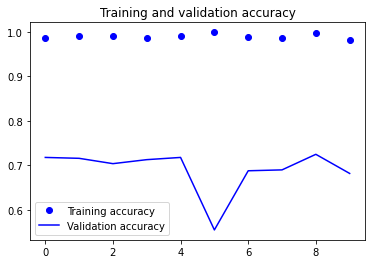

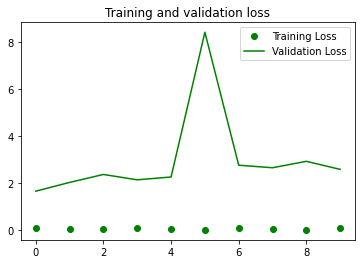

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()